<a href="https://colab.research.google.com/github/usintec/3DBEFUnet/blob/master/3DBEFUnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!git clone https://github.com/usintec/3DBEFUnet.git
%cd 3DBEFUnet

# Install dependencies
!pip install -r requirements.txt


Cloning into '3DBEFUnet'...
remote: Enumerating objects: 217, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 217 (delta 133), reused 143 (delta 71), pack-reused 0 (from 0)
Receiving objects: 100% (217/217), 688.78 KiB | 7.25 MiB/s, done.
Resolving deltas: 100% (133/133), done.
/content/3DBEFUnet
Ignoring numpy: markers 'platform_system == "Windows"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 19.9 MB/s e

In [2]:
%cd 3DBEFUnet

/content/3DBEFUnet


In [3]:
!git pull

remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 743 bytes | 247.00 KiB/s, done.
From https://github.com/usintec/3DBEFUnet
   14a0560..96e5457  master     -> origin/master
Updating 14a0560..96e5457
Fast-forward
 trainer.py | 181 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 1 file changed, 181 insertions(+)


In [ ]:
!pip install -r requirements.txt --upgrade
import os, sys
os.kill(os.getpid(), 9)   # force restart so numpy reloads correctly


Ignoring numpy: markers 'platform_system == "Windows"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 101.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      S

In [1]:
# =========================
# Setup Kaggle & Download BraTS2020 Dataset
# =========================

# Install required libraries
!pip install -q nibabel pydicom nilearn matplotlib opencv-python kaggle

import os
import zipfile
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import glob
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import random
import scipy.ndimage as ndimage

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 24.3 MB/s eta 0:00:00


In [2]:
# =========================
# 1. Kaggle API Setup
# =========================
# Upload kaggle.json from your Kaggle account to Colab
from google.colab import files

print("Please upload your kaggle.json (from Kaggle > Account > Create API Token)")
files.upload()

# Move kaggle.json to ~/.kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# =========================
# 2. Download BraTS2020 Dataset
# =========================
!kaggle datasets download -d awsaf49/brats20-dataset-training-validation -p /content/

# Unzip dataset
!unzip -q /content/brats20-dataset-training-validation.zip -d /content/brats2020


Please upload your kaggle.json (from Kaggle > Account > Create API Token)


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/awsaf49/brats20-dataset-training-validation
License(s): CC0-1.0
 99% 4.13G/4.16G [00:59<00:01, 20.2MB/s]
100% 4.16G/4.16G [00:59<00:00, 75.6MB/s]


In [3]:
# Check dataset structure
!ls /content/brats2020

# =========================
# 3. Load & Explore MRI Data
# =========================
# Example: Load one subject
example_path = glob.glob("/content/brats2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/*.nii*")[0]
print("Example file:", example_path)

# Load NIfTI image using nibabel
img = nib.load(example_path)
img_data = img.get_fdata()

print("Image shape:", img_data.shape)  # typically (240, 240, 155)


BraTS2020_TrainingData	BraTS2020_ValidationData
Example file: /content/brats2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii
Image shape: (240, 240, 155)


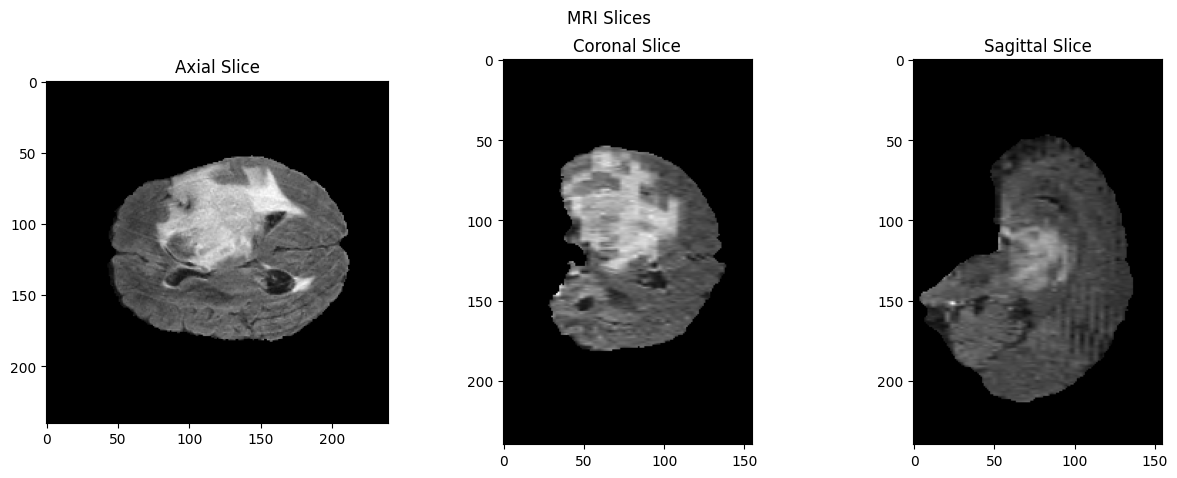

In [ ]:
# =========================
# 4. Visualize MRI slices
# =========================
def plot_slices(img_data, title="MRI Slices"):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(img_data[:, :, img_data.shape[2]//2], cmap="gray")
    axes[0].set_title("Axial Slice")
    axes[1].imshow(img_data[:, img_data.shape[1]//2, :], cmap="gray")
    axes[1].set_title("Coronal Slice")
    axes[2].imshow(img_data[img_data.shape[0]//2, :, :], cmap="gray")
    axes[2].set_title("Sagittal Slice")
    plt.suptitle(title)
    plt.show()

plot_slices(img_data)

In [ ]:
#%cd 3DBEFUnet
!python train.py \
  --output_dir /content/drive/MyDrive/outputs

Streaming output truncated to the last 5000 lines.
iter 25700 : total 0.24148 | ce 0.01884 | dice 0.32470 | dlf 0.39120
iter 25701 : total 0.21652 | ce 0.01576 | dice 0.29119 | dlf 0.35507
iter 25702 : total 0.24299 | ce 0.01037 | dice 0.34008 | dlf 0.34798
iter 25703 : total 0.25556 | ce 0.01718 | dice 0.36294 | dlf 0.30923
iter 25704 : total 0.22319 | ce 0.02726 | dice 0.29478 | dlf 0.35417
iter 25705 : total 0.29328 | ce 0.02284 | dice 0.39867 | dlf 0.44942
iter 25706 : total 0.33246 | ce 0.01935 | dice 0.43538 | dlf 0.63493
iter 25707 : total 0.30225 | ce 0.07527 | dice 0.40637 | dlf 0.28328
iter 25708 : total 0.25662 | ce 0.01716 | dice 0.34837 | dlf 0.40735
iter 25709 : total 0.22913 | ce 0.02384 | dice 0.32145 | dlf 0.26728
iter 25710 : total 0.24011 | ce 0.02666 | dice 0.34529 | dlf 0.22276
iter 25711 : total 0.27229 | ce 0.01177 | dice 0.39120 | dlf 0.32866
iter 25712 : total 0.22925 | ce 0.04121 | dice 0.30509 | dlf 0.29711
iter 25713 : total 0.25371 | ce 0.01433 | dice 0.379